In [1]:
pip install pandasgui

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ['APPDATA'] = ""

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandasgui
from pandasgui import show

url =  "https://raw.githubusercontent.com/NathanSlbg/intern-assessment-thales/main/data_log_1.csv"

df = pd.read_csv(url)

show(df)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [4]:
df.head()

,Timestamp,Accel X,Accel Y,Accel Z,Gyro X,Gyro Y,Gyro Z,Aiming
0,2024-02-15 14:25:24.786,31.00,-4.42,1.72,-1.40,0.08,-1.82,0
1,2024-02-15 14:25:24.788,8.31,-4.42,1.72,-1.73,0.02,-1.72,0
2,2024-02-15 14:25:24.793,8.26,-4.42,1.74,-2.11,0.02,-1.58,0
3,2024-02-15 14:25:24.798,8.26,-4.42,1.74,-2.46,0.03,-1.39,0
4,2024-02-15 14:25:24.803,8.24,-4.39,1.79,-2.80,0.00,-1.35,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12144 entries, 0 to 12143
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  12144 non-null  object 
 1   Accel X    12144 non-null  float64
 2   Accel Y    12144 non-null  float64
 3   Accel Z    12144 non-null  float64
 4   Gyro X     12144 non-null  float64
 5   Gyro Y     12144 non-null  float64
 6   Gyro Z     12144 non-null  float64
 7   Aiming     12144 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 759.1+ KB


In [6]:
data = df.drop(columns=['Aiming','Timestamp'])
aiming = df['Aiming']

<AxesSubplot:xlabel='Aiming', ylabel='Percent'>

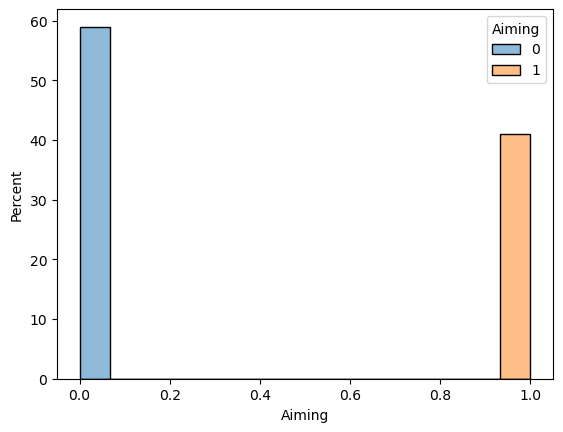

In [7]:
sns.histplot(df, x=df['Aiming'], hue=df['Aiming'], stat='percent')

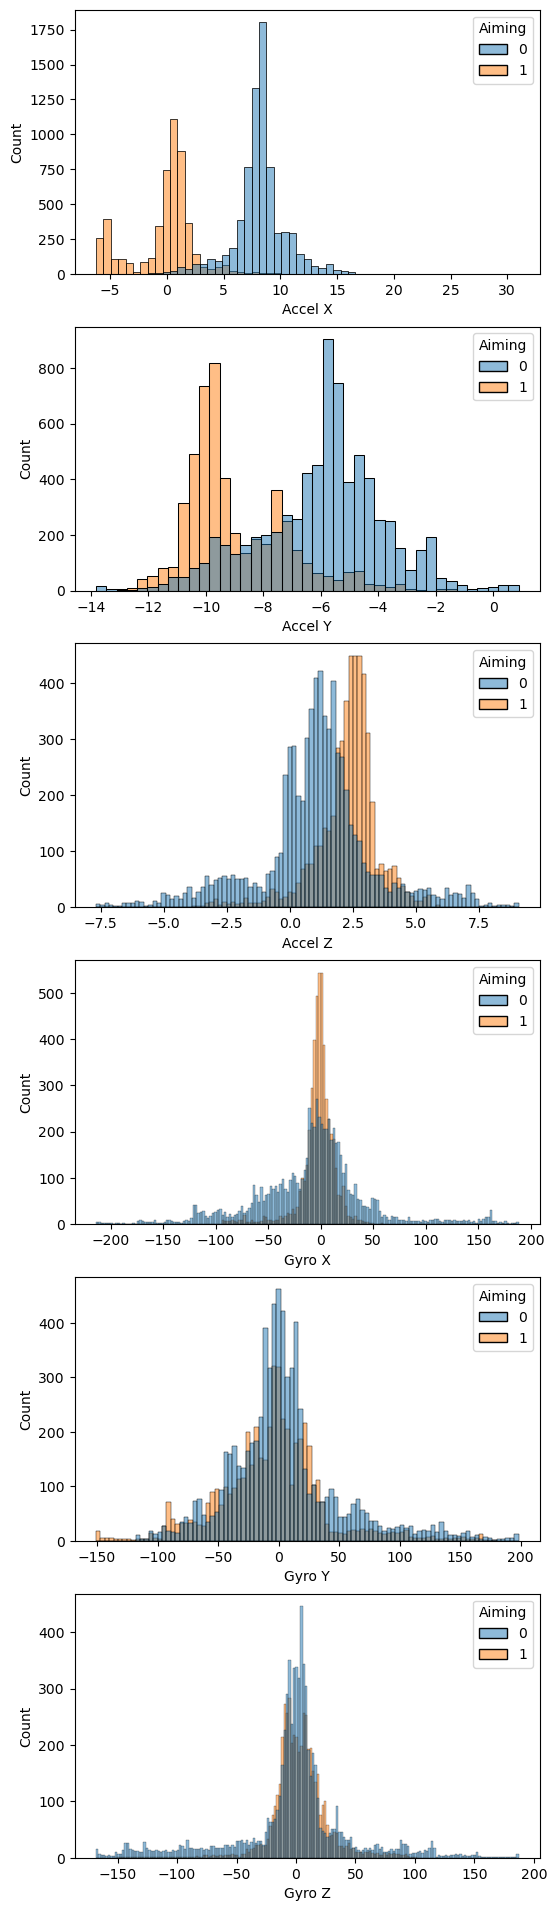

In [8]:
features_to_plot = ['Accel X','Accel Y','Accel Z','Gyro X', 'Gyro Y', 'Gyro Z']

fig, ax = plt.subplots(len(features_to_plot),1)
fig.set_figheight(len(features_to_plot)*4)
fig.set_figwidth(6)

for i, col in enumerate(features_to_plot):
    sns.histplot(df, x=df[col], ax=ax[i], hue='Aiming')


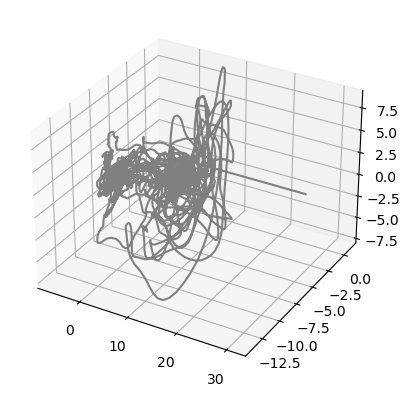

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
xline = data['Accel X']
yline = data['Accel Y']
zline = data['Accel Z']
ax.plot3D(xline, yline, zline, 'gray')

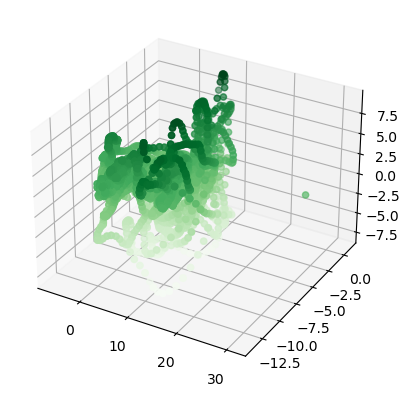

In [10]:
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
xdata = data['Accel X']
ydata = data['Accel Y']
zdata = data['Accel Z']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

<AxesSubplot:>

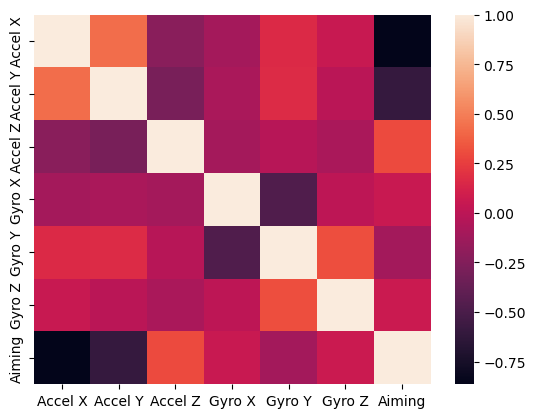

In [11]:
corr=df.corr()
sns.heatmap(corr, annot=False)

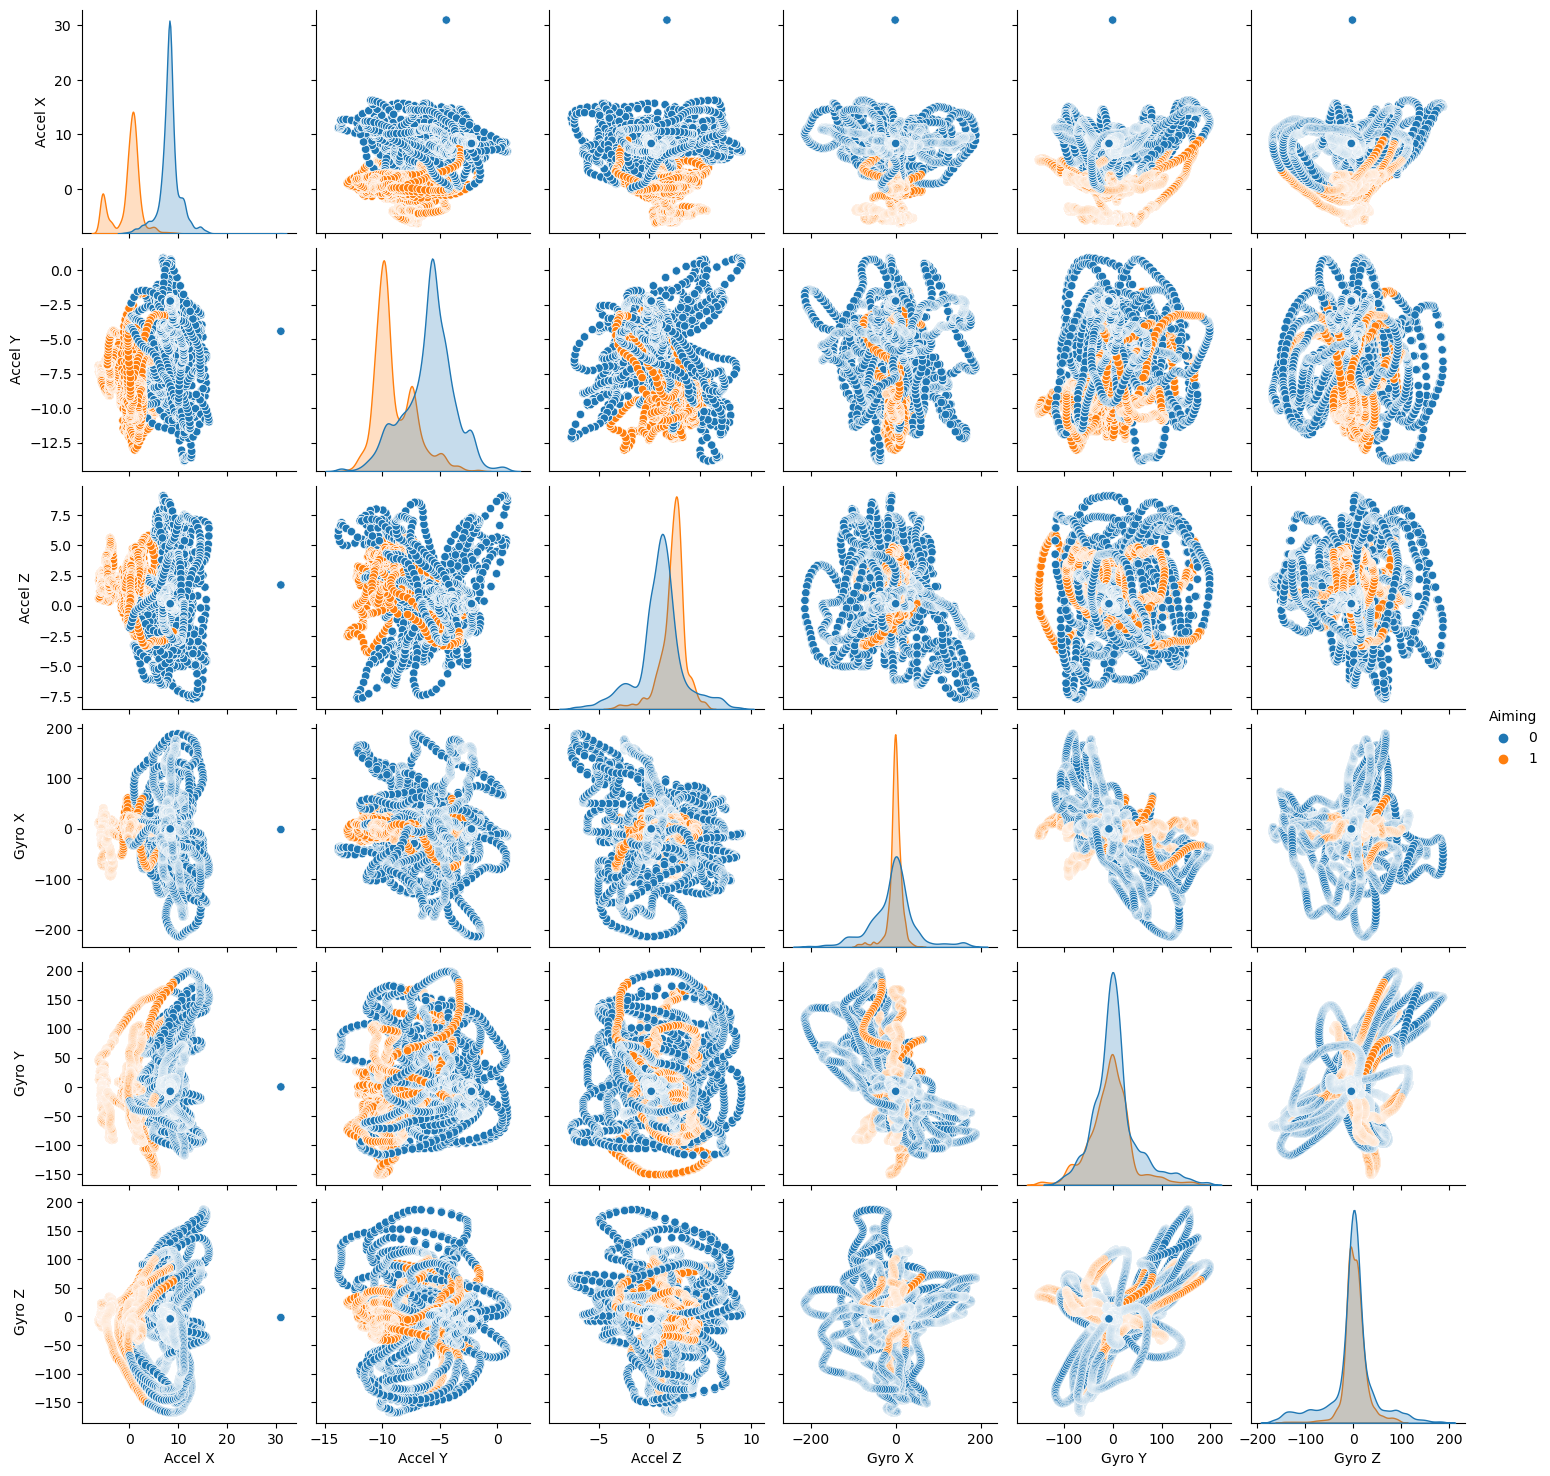

In [12]:
sns.pairplot(df, hue='Aiming')

In [13]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 200
max_leaf_nodes = 10
random_state = 42

rfc = RandomForestClassifier(n_estimators=n_estimators, max_leaf_nodes=max_leaf_nodes, random_state=random_state)

In [14]:
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

def stratified_k_fold_cross_validate(model, data, target, n_splits=10, random_state=42, return_estimators=False):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    scores = []
    estimators = []

    for train_index, test_index in skf.split(data, target):
        x_train_fold, x_test_fold = data.iloc[train_index], data.iloc[test_index]
        y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]
        model.fit(x_train_fold, y_train_fold)

        y_pred = model.predict(x_test_fold)
        score = f1_score(y_test_fold, y_pred, average='weighted')
        scores.append(score)
        estimators.append(model)

    if return_estimators:
        return np.array(scores), estimators

    return np.array(scores)

In [15]:
n_splits = 10

scores = stratified_k_fold_cross_validate(rfc, data, aiming, n_splits=n_splits, random_state=42)
print('score', scores.mean())

score 0.9809417174504059


[[1420   12]
 [  28  969]]


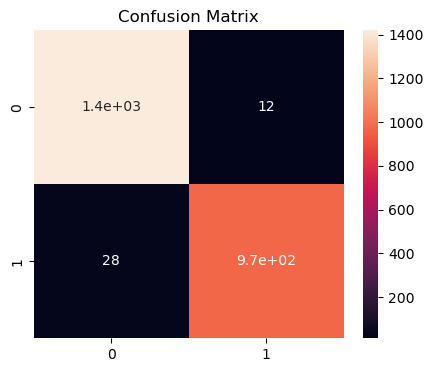

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split


def plot_confusion_matrix(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(data, aiming, stratify=df['Aiming'], test_size=0.2, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                     index = ['0','1'],
                     columns = ['0','1'])
    
    #Plotting the confusion matrix
    print(cm)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(rfc, data, aiming)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, aiming, stratify=df['Aiming'], test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10, n_estimators=200, random_state=42)

6


[Text(0, 0, 'Accel X'),
 Text(1, 0, 'Accel Y'),
 Text(2, 0, 'Accel Z'),
 Text(3, 0, 'Gyro X'),
 Text(4, 0, 'Gyro Y'),
 Text(5, 0, 'Gyro Z')]

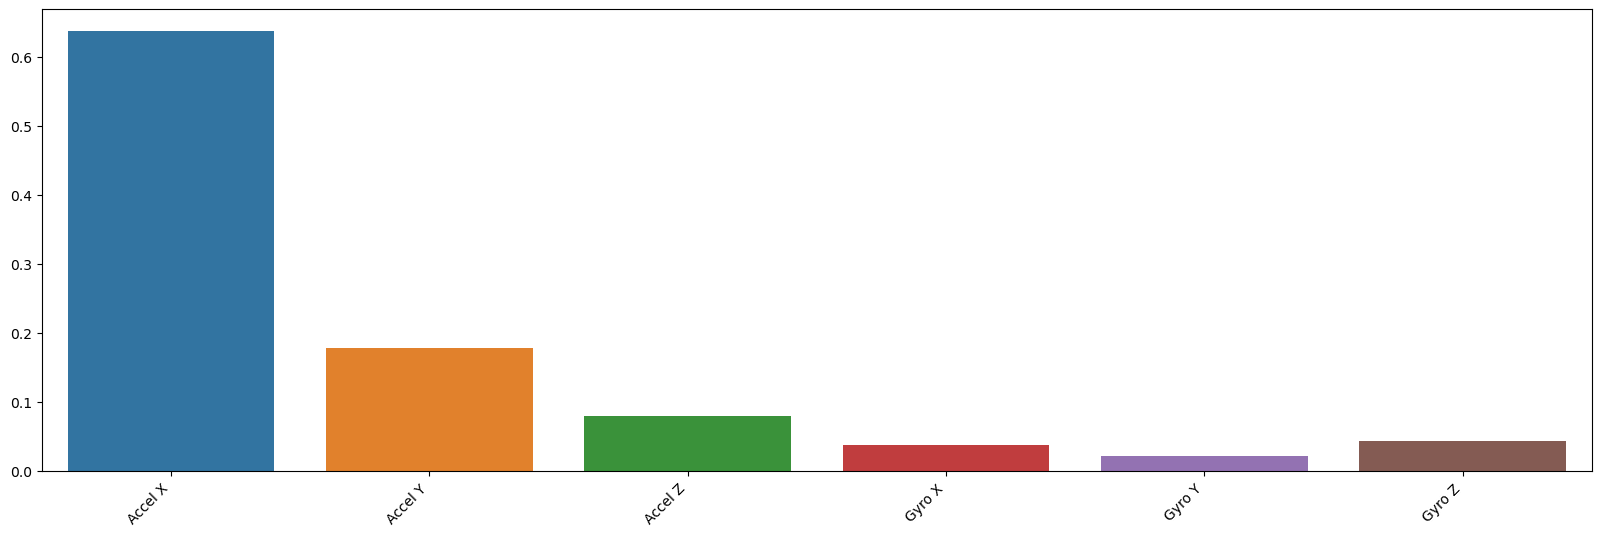

In [28]:
plt.figure(figsize=(20,6))
g = sns.barplot( x=data.columns, y=rfc.feature_importances_)
g.set_xticks(range(len(data.columns)))
g.set_xticklabels(data.columns, rotation=45, horizontalalignment='right')

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
n_splits = 10

knn_scores = stratified_k_fold_cross_validate(knn, data, aiming, n_splits=n_splits)
print('score', knn_scores.mean())

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\U

score 0.9975290970626579


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



[[1430    2]
 [   3  994]]


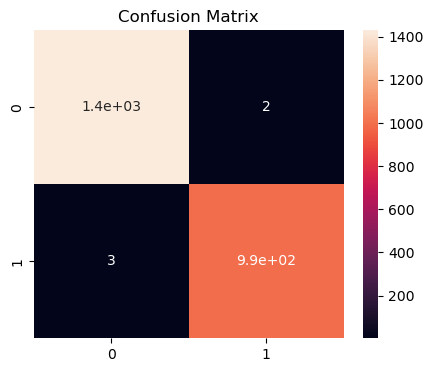

In [34]:
plot_confusion_matrix(knn, data, aiming)

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\U

> 1, train F1: 1.000, test F1: 0.998


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 2, train F1: 0.999, test F1: 0.997


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 3, train F1: 0.999, test F1: 0.997


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 5, train F1: 0.998, test F1: 0.995


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 7, train F1: 0.996, test F1: 0.993


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\U

> 9, train F1: 0.993, test F1: 0.988


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 11, train F1: 0.990, test F1: 0.984


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 13, train F1: 0.986, test F1: 0.980


C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\natha\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



> 15, train F1: 0.984, test F1: 0.978


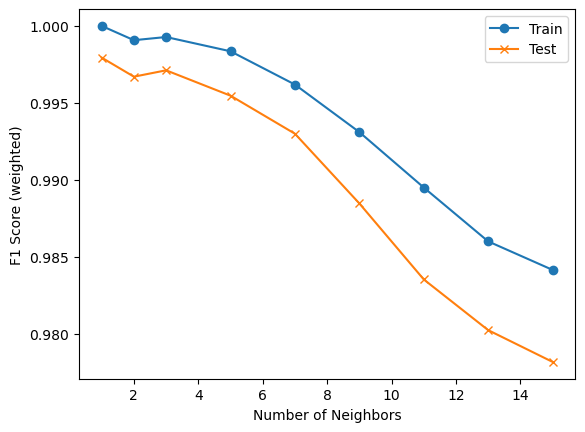

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

def plot_f1_score():
    X_train, X_test, y_train, y_test = train_test_split(data, aiming, stratify=df['Aiming'], test_size=0.2)

    # Define lists to collect scores
    train_scores, test_scores = [], []

    # Define the neighbors values to evaluate
    neighbors_values = [1,2,3, 5, 7, 9, 11, 13, 15]

    # Evaluate a KNN model for each number of neighbors
    for n_neighbors in neighbors_values:
        # Configure the KNN model
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

        # Fit the model on the training dataset
        knn_model.fit(X_train, y_train)

        # Evaluate on the train dataset
        train_yhat = knn_model.predict(X_train)
        train_f1 = f1_score(y_train, train_yhat, average='weighted')
        train_scores.append(train_f1)

        # Evaluate on the test dataset
        test_yhat = knn_model.predict(X_test)
        test_f1 = f1_score(y_test, test_yhat, average='weighted')
        test_scores.append(test_f1)

        # Summarize progress
        print(f'> {n_neighbors}, train F1: {train_f1:.3f}, test F1: {test_f1:.3f}')

    # Plot train and test scores vs number of neighbors
    plt.plot(neighbors_values, train_scores, '-o', label='Train')
    plt.plot(neighbors_values, test_scores, '-x', label='Test')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('F1 Score (weighted)')
    plt.legend()
    plt.show()

# Utiliser la fonction pour effectuer la recherche en grille
plot_f1_score()

>2, train: 0.958, test: 0.958
>3, train: 0.973, test: 0.975
>4, train: 0.976, test: 0.976
>5, train: 0.977, test: 0.976
>6, train: 0.979, test: 0.977
>7, train: 0.980, test: 0.979
>8, train: 0.984, test: 0.981
>9, train: 0.984, test: 0.982
>10, train: 0.986, test: 0.982
>11, train: 0.986, test: 0.982
>12, train: 0.987, test: 0.982
>13, train: 0.988, test: 0.982
>14, train: 0.988, test: 0.983
>15, train: 0.989, test: 0.984
>16, train: 0.989, test: 0.984
>17, train: 0.990, test: 0.985
>18, train: 0.990, test: 0.986
>19, train: 0.992, test: 0.988
>20, train: 0.992, test: 0.988


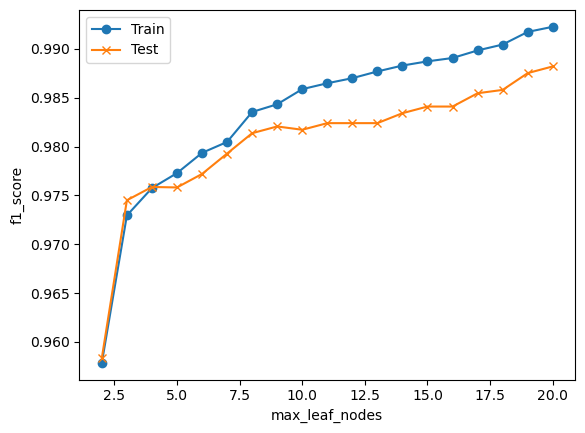

In [39]:
from sklearn.model_selection import train_test_split

def plot_f1_score():

    X_train, X_test, y_train, y_test = train_test_split(data, aiming, stratify=df['Aiming'], test_size=0.2)
    # define lists to collect scores
    train_scores, test_scores = [], []
    # define the tree depths to evaluate
    values = [i for i in range(2, 21)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        rfc = RandomForestClassifier(n_estimators=200, max_leaf_nodes=i, random_state=42)
        # fit model on the training dataset
        rfc.fit(X_train, y_train)
        # evaluate on the train dataset
        train_yhat = rfc.predict(X_train)
        train_acc = f1_score(y_train, train_yhat, average=None)[0]
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = rfc.predict(X_test)
        test_acc = f1_score(y_test, test_yhat, average=None)[0]
        test_scores.append(test_acc)
        # summarize progress
        print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
        # plot of train and test scores vs tree depth
    plt.plot(values, train_scores, '-o', label='Train')
    plt.plot(values, test_scores, '-x', label='Test')
    plt.xlabel('max_leaf_nodes')
    plt.ylabel('f1_score')
    plt.legend()
    plt.show()

plot_f1_score()